# Questão 4

O algoritmo backpropagation é o algoritmo base no processo de treinamento de redes neurais do tipo: rede perceptron de múltiplas camadas (MLP), rede convolucional (CNN), rede recorrente (ex: LSTM).

**(iv) Pesquise apresente um estudo da implementação computacional do algoritmo backpropagation para deep learning fazendo uso de tensores e computação gráfica.**

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
# Verifica se GPU está disponível
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Modelo MLP simples
class MLP(nn.Module):
    def __init__(self, input_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)  # Primeira camada escondida
        self.act1 = nn.Tanh()
        self.fc2 = nn.Linear(128, 128)  # Segunda camada escondida
        self.act2 = nn.Tanh()
        self.fc3 = nn.Linear(128, output_size)  # Camada de saída
        self.act3 = nn.Sigmoid()  # Para classificação binária

    def forward(self, x):
        x = self.act1(self.fc1(x))  # Primeira camada escondida
        x = self.act2(self.fc2(x))  # Segunda camada escondida
        x = self.act3(self.fc3(x))  # Camada de saída
        return x

# Dados de exemplo
X = torch.randn(64, 10).to(device)         # 64 amostras, 10 características
y = torch.randint(0, 2, (64, 1)).float().to(device)  # Saídas binárias

# Inicialização do modelo
model = MLP(input_size=10, output_size=1).to(device)

# Função de custo e otimizador
criterion = nn.BCELoss()  # Para saída sigmoid
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Loop de treinamento
losses = []
for epoch in range(10000):
    optimizer.zero_grad()
    output = model(X)               # Passagem direta
    loss = criterion(output, y)     # Cálculo da perda
    loss.backward()                 # Backpropagation (automático com PyTorch)
    optimizer.step()                # Atualização dos pesos
    losses.append(loss.item())

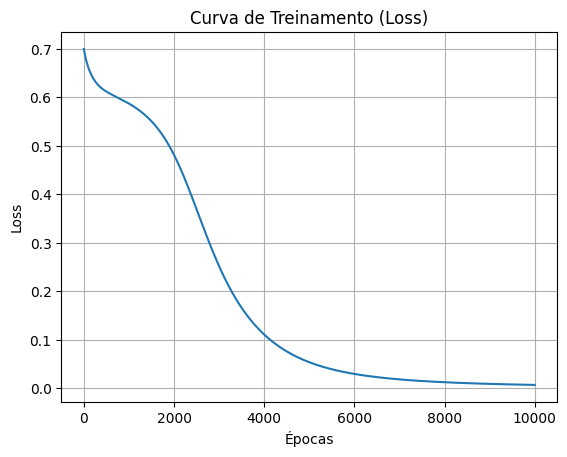

In [3]:
# Plot da curva de perda
plt.plot(losses)
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Curva de Treinamento (Loss)')
plt.grid(True)
plt.show()